In [48]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase

from scipy.ndimage import rotate
import os


import seaborn as sns
import sqlite3

### Set the folder paths for the data
### DATA FOLDER PATHS
data_folder = '../../data/' # ROSTER DATA & GAME STATS
## IMAGES FOLDER PATHS
logo_folder = '../../images/logos/' 
background_folder = '../../images/backgrounds/'

# Roster Data Paths
roster_path_current = 'rosters/2023_master_roster.csv'
roster_path_previous = 'rosters/2022_master_roster.csv'
# Once the Database Clean and Transform code is updated to insert the roster, we can use the data from the database

# Game Stats Database Path
db_folder = '../../data/db/'
# db_path = '2023_YTD_Game_Stats_Cleaned.db'
db_path = 'Dec_11_Current_YTD_Game_Stats.db'

## Connect to the Database
conn = sqlite3.connect(db_folder + db_path)

matchup_tag = "GLI_1"

### DEFINE TEMP FOLDER - MAKE SURE IT IS NOT OVERWRITTEN BELOW
TEMP_FOLDER = '../../TEMP/images/'

# Signature Tags with Source and Github

In [49]:
def add_source_sig_text():
    # Add text at the bottom left corner
    padding = 3  # Padding in points
    plt.annotate('DATASOURCE: College Hockey News | Dec 11, 2023', xy=(0, 0), xycoords='figure fraction',
                 xytext=(padding, padding), textcoords='offset points', ha='left', va='bottom', fontsize=14)

    # Create a new axes to the right outside of the main plot for the GitHub logo
    ax2 = plt.gcf().add_axes([1.005, 0.12, 0.04, 0.04], frame_on=False)  # Adjusted values for positioning & size

    # # Load and add the GitHub logo
    # github_img = mpimg.imread('../../images/logos/github.png')  # Replace with the path to your GitHub logo
    # # Rotate the GitHub logo
    # github_img = rotate(github_img, 90)  # Rotate by 90 degrees
    # ax2.imshow(github_img)
    ax2.axis('off')

    # Add GitHub username rotated next to the logo
    # plt.gcf().text(1.015, 0.3, 'GitHub - JSmith1826/college_hockey', fontsize=14, ha='right', va='center', rotation=90)


# Figure Size and Font Settings

In [50]:

## Make Sure Font Library is updated
import matplotlib.font_manager
# matplotlib.font_manager._rebuild()


# Adjust the default chart size and aspect ratio
### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (10, 8) # Original
fig_deafult_2 = (12, 10)
square_fig = (10, 10)
# Turn on/off the figure size by commenting/uncommenting the lines below
# figure_size = fig_deafult_1
# figure_size = fig_deafult_2


figure_size = square_fig

#### INSTAGRAM SIZE - Portrait
dpi = 300
width, height = 1080, 1350  # in pixels
# figure_size = (width / dpi, height / dpi)  # in inches

### INSTAGRAM - SQUARE
# Assuming 300 DPI for good quality
# dpi = 300
# width, height = 1080, 1080  # in pixels
# figsize = width / dpi, height / dpi  # in inches




## FONT PARAMETERS
font_title_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 16}
font_label_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 14}
font_tick_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 8}
font_label_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 16}
font_tick_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 14}

font_tag_parm = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'bold', 'size': 10}
font_tag_parm_2 = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'bold', 'size': 12}


################################
### ORIGINAL FONT PARAMETERES
################################
# ## FONT PARAMETERES
# font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 36}
# font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
# font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 20}
# font_label_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 20}
# font_tick_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 16}

# font_tag_parm = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 12}
# #################################


########### Source and Sig Tags ###########


In [51]:
### Teams and Colors

team_1 = 'Michigan State'
team_2 = 'Ferris State'
team_3 = 'Michigan Tech'
team_4 = 'Alaska'

team_1_abv = 'MSU'
team_2_abv = 'FSU'
team_3_abv = 'MTU'
team_4_abv = 'AKA'

# Logo Folder Path
logo_folder = '../../images/logos/'
team_1_logo_path = logo_folder + 'msu.png'
team_2_logo_path = logo_folder + 'fsu.png'
team_3_logo_path = logo_folder + 'mtu.png'
team_4_logo_path = logo_folder + 'aka.png'

# Team Colors (Dark, light, dark_muted)
team_1_colors = ['#18453B', '#FFFFFF', '#2a6256']
team_2_colors = ['#BA0C2F', '#FFD043', '#D23A5D']
team_3_colors = ['#000000', '#FFCD00', '#36454F']
team_4_colors = ['#236192', '#FFC000', '#569CD6']

# Primary Team Color dictionary
team_colors = {team_1: '#18453B',
                team_2: '#BA0C2F',
                team_3: '#000000',
                team_4: '#236192'}

# ### Do it this way so i can reuse code from MSU_Explore_and_Plot notebook
highlight_colors = team_colors

#### Set Background Image
path_to_bg_image =  'generic_dark_background.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
# bg_img = mpimg.imread(background_folder + path_to_bg_image)
bg_img = None

# # Set the order of Teams - Keep this order consistent - Keep semi-matchups grouped
team_order = [team_1, team_2, team_3, team_4]


In [52]:
# ### Set the Output Folder for the images
# TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

# # Set the order of the positions
# position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# # Set the order of Class Rank
# class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # # Create a filtered dataframe for Two Schools We want to highlight from the master roster in the database
# roster_query_filtered = f"SELECT * FROM master_roster WHERE Team IN ('{team_1}', '{team_2}');"

# # Get the entire roster from the master roster in the database
# roster_query_full = f"SELECT * FROM master_roster;"

# df_filtered = pd.read_sql(roster_query_filtered, conn)
# df_full = pd.read_sql(roster_query_full, conn)

# # Filter out any rows from df_full where Wt or Height is null or 0
# df_full = df_full[(df_full['Wt'].notnull()) & (df_full['Height_Inches'].notnull())]
# df_full = df_full[(df_full['Wt'] != 0) & (df_full['Height_Inches'] != 0)]



# ########### Create the Plots ###########
# def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
#     # Create subplot
#     fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=dpi)
    
#     # Set Axis ranges
#     ax.set_xlim([0, len(x_order)])

#     # Background Image
#     x_range = ax.get_xlim()
#     y_min = df[y_col].min()
#     y_max = df[y_col].max()
#     ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

#     # Plots
#     sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
#     sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
#     sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='Team', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=2)

#     # Titles and Labels
#     ax.set_title(title, fontdict=font_title_param)
#     ax.set_ylabel(y_label, fontdict=font_label_param)
#     ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
#     ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
#     ax.set_xlabel('')

#     ########## Conver the tick marks to feet and inches in the Height Plots ##########
#     # Check if y_col is for height and then apply the conversion
#     if y_col == 'Height_Inches':
#         ax.set_yticks(ax.get_yticks())
#         ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
#     else:
#         ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
#     # Get upper bounds of the axis
#     x_max = ax.get_xlim()[1]
#     y_max = ax.get_ylim()[1]

#     # Get lower bounds of the axis
#     x_min = ax.get_xlim()[0]
#     y_min = ax.get_ylim()[0]

#     # # Define a function to place logos at given coordinates
#     # def place_logo(image_path, xy, ax, zoom=0.3):
#     #     img = plt.imread(image_path)
#     #     imagebox = OffsetImage(img, zoom=zoom)
#     #     ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
#     #     ax.add_artist(ab)
    
# ##########################################
#     # # Place logos at upper corners
#     # place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
#     # place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
# ############################################

#     # # # Drop Legend if there is any
#     if ax.get_legend() is not None:
#         ax.get_legend().remove()

#     ### Add Source and Signature Tags
#     # add_source_sig_text()


#     plt.tight_layout()
#     save_path = f'{TEMP_FOLDER}'
#     os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
#     # Save Plot
#     plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    
#     plt.show()

# # Weight by Class Rank:
# # generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Class Rank:
# # generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Weight by Position:
# generate_plot('Position', 'Wt', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Weight (lb)', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Position:
# generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



In [53]:
# ### Set the Output Folder for the images
# TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

# # Set the order of the positions
# position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# # Set the order of Class Rank
# class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # # Create a filtered dataframe for Two Schools We want to highlight from the master roster in the database
# roster_query_filtered = f"SELECT * FROM master_roster WHERE Team IN ('{team_3}', '{team_4}');"

# # Get the entire roster from the master roster in the database
# roster_query_full = f"SELECT * FROM master_roster;"

# df_filtered = pd.read_sql(roster_query_filtered, conn)
# df_full = pd.read_sql(roster_query_full, conn)

# # Filter out any rows from df_full where Wt or Height is null or 0
# df_full = df_full[(df_full['Wt'].notnull()) & (df_full['Height_Inches'].notnull())]
# df_full = df_full[(df_full['Wt'] != 0) & (df_full['Height_Inches'] != 0)]



# ########### Create the Plots ###########
# def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
#     # Create subplot
#     fig, ax = plt.subplots(1, 1, figsize=figure_size, dpi=dpi)
    
#     # Set Axis ranges
#     ax.set_xlim([0, len(x_order)])

#     # Background Image
#     x_range = ax.get_xlim()
#     y_min = df[y_col].min()
#     y_max = df[y_col].max()
#     ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

#     # Plots
#     sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
#     sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
#     sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='Team', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=2)

#     # Titles and Labels
#     ax.set_title(title, fontdict=font_title_param)
#     ax.set_ylabel(y_label, fontdict=font_label_param)
#     ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
#     ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
#     ax.set_xlabel('')

#     ########## Conver the tick marks to feet and inches in the Height Plots ##########
#     # Check if y_col is for height and then apply the conversion
#     if y_col == 'Height_Inches':
#         ax.set_yticks(ax.get_yticks())
#         ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
#     else:
#         ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
#     # Get upper bounds of the axis
#     x_max = ax.get_xlim()[1]
#     y_max = ax.get_ylim()[1]

#     # Get lower bounds of the axis
#     x_min = ax.get_xlim()[0]
#     y_min = ax.get_ylim()[0]

#     # # Define a function to place logos at given coordinates
#     # def place_logo(image_path, xy, ax, zoom=0.3):
#     #     img = plt.imread(image_path)
#     #     imagebox = OffsetImage(img, zoom=zoom)
#     #     ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
#     #     ax.add_artist(ab)
    
# ##########################################
#     # # Place logos at upper corners
#     # place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
#     # place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
# ############################################

#     # # # Drop Legend if there is any
#     if ax.get_legend() is not None:
#         ax.get_legend().remove()

#     ### Add Source and Signature Tags
#     # add_source_sig_text()


#     plt.tight_layout()
#     save_path = f'{TEMP_FOLDER}'
#     os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
#     # Save Plot
#     plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    
#     plt.show()

# # Weight by Class Rank:
# # generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Class Rank:
# # generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Weight by Position:
# generate_plot('Position', 'Wt', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Weight (lb)', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Position:
# generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_full, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



## Helper Functions & Logo Mapping

In [54]:

# Function to plot logos
def plot_logo(image, x, y, ax, zoom=0.05, zorder=100):
    img = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(img, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0, box_alignment=(0.5, 0.5), zorder=zorder)
    ax.add_artist(ab)

# Function to add logos to any plot
def add_logos_to_plot(df, x_col, y_col, team_colors, logo_mapping, ax):
        
    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = df[df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = df[df['Team'] == team_abrv_mapping[team]]
        
        if not team_data.empty:
            x, y = team_data[x_col].values[0], team_data[y_col].values[0]
            
            if team in logo_mapping:
                logo_img = mpimg.imread(logo_folder + logo_mapping[team])
                plot_logo(logo_img, x, y, ax)
            else:
                plt.scatter(x, y, color=color, s=100, zorder=5, marker='x')
        else:
            print(f"No data found for team {team}")


# Dictionary to map team names to their logo filenames
logo_mapping = {
    
    'Michigan State': 'msu.png',
    'Michigan Tech': 'mtu.png',
    'Ferris State': 'fsu.png',
    'Alaska': 'aka.png',
    
}

## Create combined Scatter Plot image (for half page)

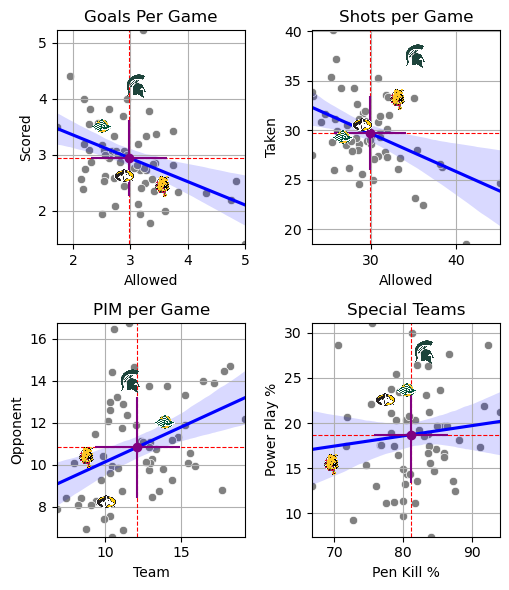

In [55]:
#### Set Figure Size
half_page = (5.2, 6) # Half Page


# AVG GOALS FOR AND AGAINST
avg_goals_query = """
SELECT
    a.Team,
    AVG(a.goalsT) AS Avg_Goals_Scored,
    AVG(b.goalsT) AS Avg_Goals_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""
# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)
# Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()


####### AVERAGE SHOTS
avg_shots_query = """
SELECT
    a.Team,
    AVG(a.shotsT) AS Avg_Shots_Taken,
    AVG(b.shotsT) AS Avg_Shots_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""
# Execute the query and store the results in a DataFrame
avg_shots_df = pd.read_sql(avg_shots_query, conn)

# Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()
#########

############# PIM PER GAME #############
# SQL query to calculate the average penalty minutes "for" and "against" each team
avg_penalty_for_against_query = """
WITH PenaltyFor AS (
    SELECT
        Team,
        AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    )
    GROUP BY Team
),
PenaltyAgainst AS (
    SELECT
        b.Team,
        AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    ) AS a
    JOIN penalty_summary AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY b.Team
)
SELECT
    a.Team,
    a.Avg_Penalty_Minutes_For,
    b.Avg_Penalty_Minutes_Against
FROM PenaltyFor AS a
JOIN PenaltyAgainst AS b ON a.Team = b.Team;
"""

# Execute the query and store the results in a DataFrame
avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
# avg_penalty_for_against_df.head()

# Calculate average and standard deviation for "For" and "Against"
avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()
#####################################################

##### PP % vs PK % #####



# Create the scatter plot with trend line, average, and standard deviation
fig, axs = plt.subplots(2, 2, figsize=half_page)  # Create a figure and a set of subplots, and get the Axes object.

### TOP LEFT - GOALS
# Set the axis limits
axs[0,0].set_xlim([avg_goals_df['Avg_Goals_Allowed'].min(), avg_goals_df['Avg_Goals_Allowed'].max()])
axs[0,0].set_ylim([avg_goals_df['Avg_Goals_Scored'].min(), avg_goals_df['Avg_Goals_Scored'].max()])

# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='grey', ax=axs[0, 0])
# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue', ax=axs[0, 0])
# Add average lines
axs[0,0].axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
axs[0,0].axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[0,0].errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# # Highlight specific teams with their logos
# for team, color in highlight_colors.items():
#     team_data = avg_goals_df[avg_goals_df['Team'] == team]
#     plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x', ax=axs[0, 0])

# plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], c='red', s=100, marker='o', zorder=99, ax=axs[0, 0])

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', team_colors, logo_mapping, ax=axs[0,0])

# Add title and axis labels
axs[0,0].set_title('Goals Per Game')
axs[0,0].set_xlabel('Allowed')
axs[0,0].set_ylabel('Scored')


########################### SHOTS ###########################
### TOP RIGHT - SHOTS
# Set the axis limits
axs[0,1].set_xlim([avg_shots_df['Avg_Shots_Allowed'].min(), avg_shots_df['Avg_Shots_Allowed'].max()])
axs[0,1].set_ylim([avg_shots_df['Avg_Shots_Taken'].min(), avg_shots_df['Avg_Shots_Taken'].max()])

# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='grey', ax=axs[0, 1])
# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue', ax=axs[0, 1])
# Add average lines
axs[0,1].axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
axs[0,1].axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[0,1].errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='o')

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', team_colors, logo_mapping, ax=axs[0,1])

# Add title and axis labels
axs[0,1].set_title('Shots per Game')
axs[0,1].set_xlabel('Allowed')
axs[0,1].set_ylabel('Taken')
#############################################################

########################### PIM ###########################
### BOTTOM LEFT - PIM
# Set the axis limits
axs[1,0].set_xlim([avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].min(), avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].max()])
axs[1,0].set_ylim([avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].min(), avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].max()])
# Scatter plot background data (all NCAA teams)
sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='grey', ax=axs[1, 0])
# Add trend line
sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue', ax=axs[1, 0])
# Add average lines
axs[1,0].axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
axs[1,0].axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)
# Add standard deviation lines
axs[1,0].errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', team_colors, logo_mapping, ax=axs[1,0])

# Add title and axis labels
axs[1,0].set_title('PIM per Game')
axs[1,0].set_xlabel('Team')
axs[1,0].set_ylabel('Opponent')
#############################################################

########################### PP % vs PK % ###########################
# Load the csv with the penalty data
penalty_data = pd.read_csv('../../GLI_program/powerplay_penkill_table.csv')
                           
            
# Create the scatter plot with trend line, average, and standard deviation
### BOTTOM RIGHT - PP % vs PK %
# Set the axis limits
axs[1,1].set_xlim([penalty_data['PK%'].min(), penalty_data['PK%'].max()])
axs[1,1].set_ylim([penalty_data['PP%'].min(), penalty_data['PP%'].max()])

# Scatter plot for all teams
sns.scatterplot(data=penalty_data, x='PK%', y='PP%', color='grey', ax=axs[1, 1])
# Add trend line
sns.regplot(data=penalty_data, x='PK%', y='PP%', scatter=False, color='blue', ax=axs[1, 1])

# Calculate and Add trend line
pk_percent = np.unique(penalty_data['PK%'])
pp_percent_trend = np.poly1d(np.polyfit(penalty_data['PK%'], penalty_data['PP%'], 1))(pk_percent)
axs[1,1].plot(pk_percent, pp_percent_trend, color='blue', linestyle='--', linewidth=0.8)

# Add average lines
axs[1,1].axhline(y=penalty_data['PP%'].mean(), color='red', linestyle='--', linewidth=0.8)
axs[1,1].axvline(x=penalty_data['PK%'].mean(), color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
axs[1,1].errorbar(penalty_data['PK%'].mean(), penalty_data['PP%'].mean(), xerr=penalty_data['PK%'].std(), yerr=penalty_data['PP%'].std(), color='purple', fmt='o')

# Add logos (if function available)
add_logos_to_plot(penalty_data, 'PK%', 'PP%', team_colors, logo_mapping, ax=axs[1,1])


# Add title and axis labels
axs[1,1].set_title('Special Teams')
axs[1,1].set_xlabel('Pen Kill %')
axs[1,1].set_ylabel('Power Play %')


#### Add grid to all plots
for ax in axs.flat:
    ax.grid(True)


plt.tight_layout()

# ### Set the Output Folder for the images
TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'


plt.savefig(f'{TEMP_FOLDER}team_comparison.png', bbox_inches='tight', dpi=600, transparent=True)
plt.show()


## Stats by Class Rank

In [56]:
# ###### HOTFIX FOR TICKS ######
# font_tick_param = {'family': 'Robo', 'weight': 'bold', 'size': 12}

away_games_df = pd.read_sql("""
SELECT 
    Away_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Away
FROM game_details
GROUP BY Away_Team;
""", conn)

home_games_df = pd.read_sql("""
SELECT 
    Home_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Home
FROM game_details
GROUP BY Home_Team;
""", conn)


games_played_count = pd.merge(away_games_df, home_games_df, how='outer', on='Team')
games_played_count['Num_Games'] = games_played_count['Num_Games_Away'].fillna(0) + games_played_count['Num_Games_Home'].fillna(0)
games_played_count = games_played_count[['Team', 'Num_Games']]

games_played_count.tail()

class_rank_stats_df = pd.read_sql("""
SELECT
    mr.Yr,
    ps.Team,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.Sh) AS Total_Shots,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.plus_minus) AS Total_Plus_Minus,
    SUM(ps.PIM) AS Total_PIM
    
FROM master_roster AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.Yr, ps.Team
ORDER BY mr.Yr, ps.Team;
""", conn)



final_df = pd.merge(class_rank_stats_df, games_played_count, how='left', on='Team')
# # # ## Calculate the average stats per class
final_df['AVG_Goals'] = final_df['Total_Goals'] / final_df['Num_Games']
final_df['AVG_Assists'] = final_df['Total_Assists'] / final_df['Num_Games']
final_df['AVG_Points'] = final_df['Total_Points'] / final_df['Num_Games']
final_df['AVG_PIM'] = final_df['Total_PIM'] / final_df['Num_Games']
final_df['AVG_Shots'] = final_df['Total_Shots'] / final_df['Num_Games']
final_df['AVG_Plus_Minus'] = final_df['Total_Plus_Minus'] / final_df['Num_Games']


final_df.head(20)

##### Create the filtered dataframe for the two teams we want to highlight
final_df_filtered = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2) | (final_df['Team'] == team_3) | (final_df['Team'] == team_4)]

# Set the order of the class ranks
class_rank_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# Function to create individual plots for each metric
def create_metric_plot(metric, title, bg_img, alpha_value, ax):
  
    

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order, zorder=1)

    # Overlay larger, more opaque bars for Michigan State and Boston College
        # Overlay larger, more opaque bars for specified teams
    sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered, 
                palette=team_colors, ax=ax, ci=None, alpha=0.8, order=class_rank_order, edgecolor='black', linewidth=1, hue_order=team_order,
                zorder=3)
    
    # Get the x and y limits after plotting the data
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()



    # Add labels and title
    ax.set_ylabel(title, fontsize=14)
    # Remove x label
    ax.set_xlabel('')

    
    plt.xlabel('', font_label_param)
    plt.ylabel("", font_label_large_param)
    
    
    # Tick labels
    ax.set_xticklabels(ax.get_xticklabels(), **font_tick_large_param)
    ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)

## Combine those 4 plots into a single graphic if we want to use

C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\123299021.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\123299021.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr', y=metric, hue='Team', data=final_df_filtered,
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\123299021.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), **font_tick_large_param)
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\123299021.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_tick_param)
C:\Users\Justin\AppData\Local

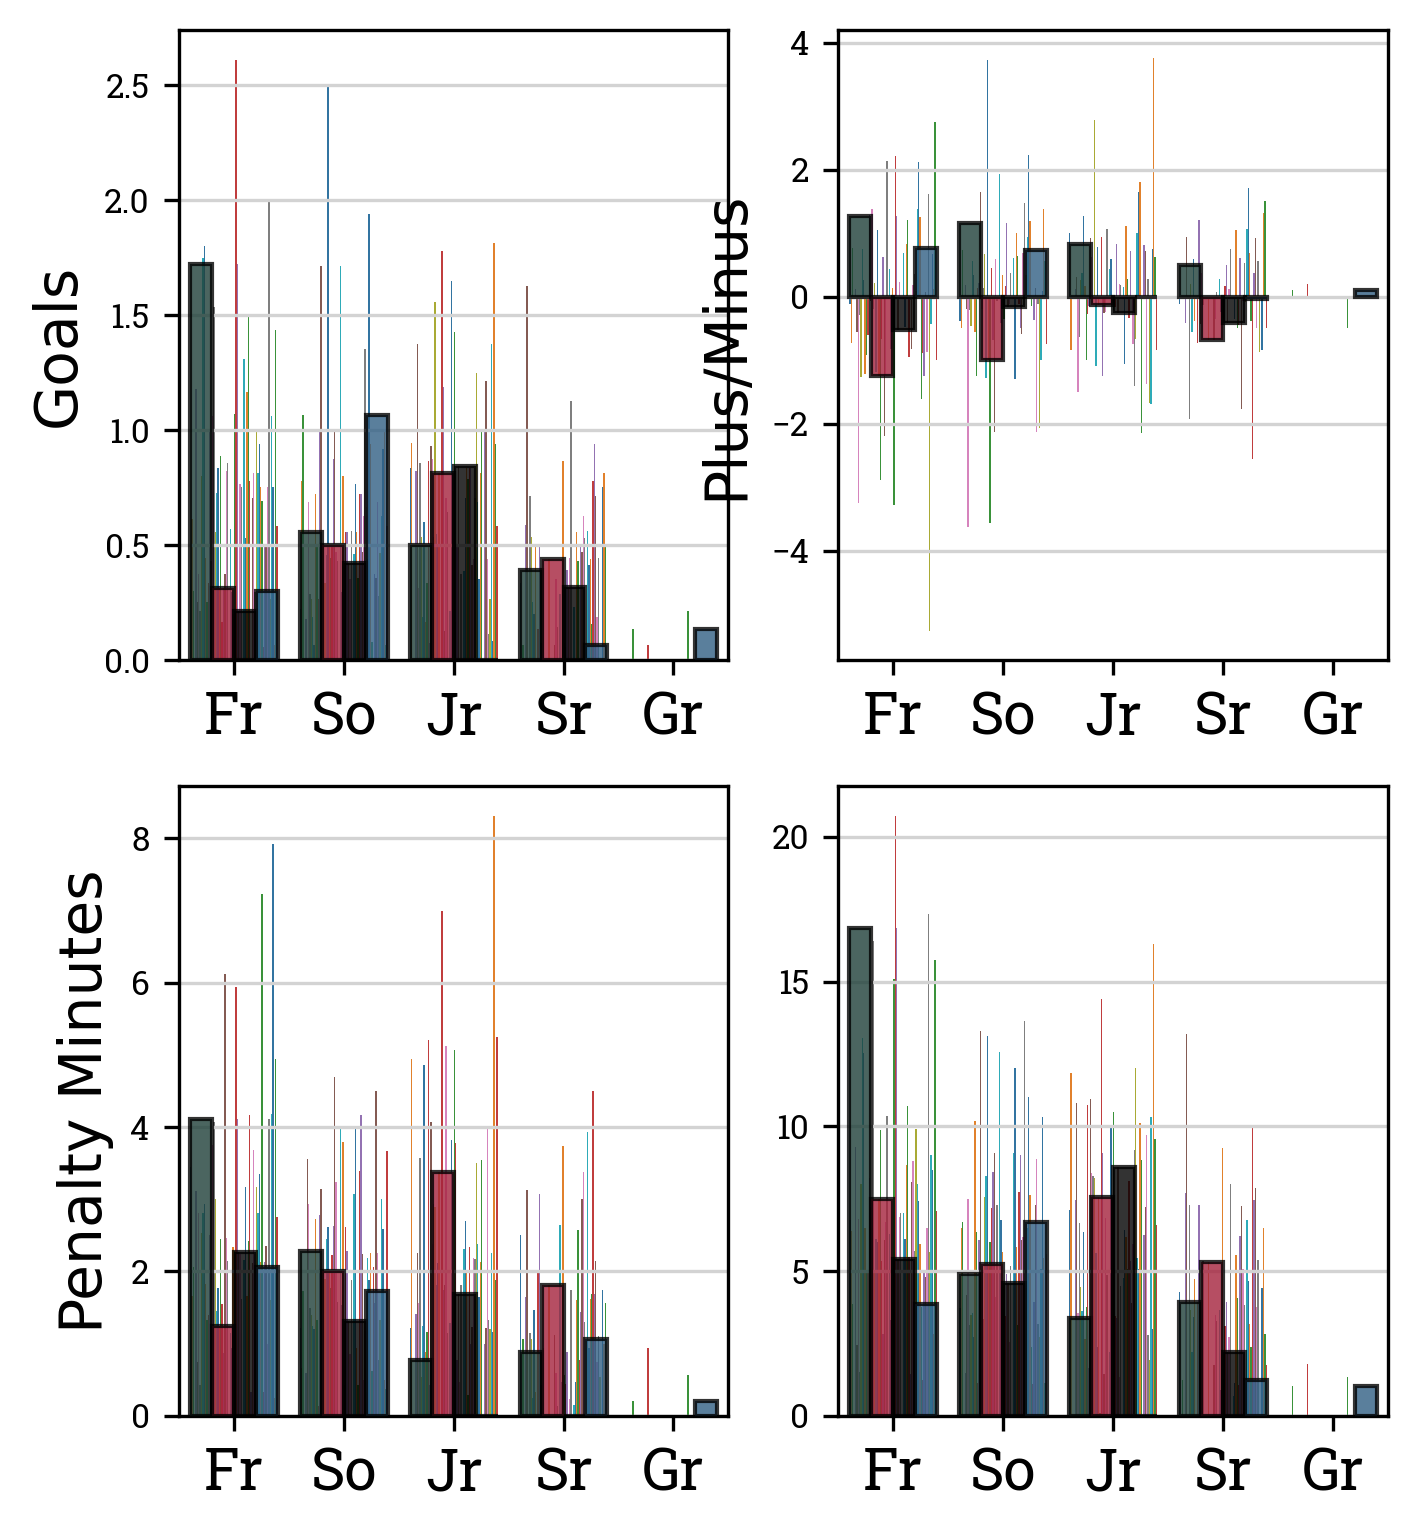

In [57]:
########## Create a 2 x 2 grid of CLASS RANK plots ##########
# Create the figure and axes
fig, axs = plt.subplots(2, 2, figsize=half_page, dpi=dpi)

# Create the plots
create_metric_plot('AVG_Goals', 'Goals', bg_img, alpha_value, ax=axs[0,0])
create_metric_plot('AVG_Plus_Minus', 'Plus/Minus', bg_img, alpha_value, ax=axs[0,1])
# create_metric_plot('AVG_Points', 'Points per Game', bg_img, alpha_value, ax=axs[0,1])
create_metric_plot('AVG_PIM', 'Penalty Minutes', bg_img, alpha_value, ax=axs[1,0])
create_metric_plot('AVG_Shots', 'Shots', bg_img, alpha_value, ax=axs[1,1])


# Add a title
# fig.suptitle('Class Rank Stats', fontsize=16)

# Adjust the spacing between plots
fig.tight_layout()

# Remove legends in any of the plots
for ax in axs.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# ADD HORIZONTAL GRIDS TO ALL PLOTS - lines light grey and behind the bars
for ax in axs.flat:
    ax.grid(axis='y', color='lightgrey', linestyle='-', linewidth=0.8, zorder=1)

# ADD A TITLE TO THE ENTIRE FIGURE
# fig.suptitle('Stats by Class Rank (per game)', **font_title_param)


# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

plt.savefig(f'{TEMP_FOLDER}Class_Rank_Stats.png', bbox_inches='tight')

# Show the plot
plt.show()

## Line By Line Breakdown

#### To Do
- Remove 4th line from defensive plot
- re work to a 3 x 2 graph for half page


In [58]:


# # Set up the plot
# fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# # set the font style for the title
# # title = fig.suptitle('Goals per Game by Line', **font_title_param)

# # Adjust padding and plot borders
# plt.subplots_adjust(hspace=0.25, top=0.9, bottom=0.1)






# # Filter data for Forwards and Defensemen
# forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
# defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# # Plot data for Forwards
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data, 
#             color='grey', alpha=0.6, ax=ax[0], ci=None)
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
#             palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Plot data for Defensemen
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data, 
#             color='grey', alpha=0.6, ax=ax[1], ci=None, linewidth=2)
# sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Add labels and title
# ax[0].set_title('Goals Per Game by Line', font_title_param)
# # ax[1].set_title('Defensemen', font_label_large_param)
# ax[0].set_xlabel('Line', font_label_param)
# ax[1].set_xlabel('Pair', font_label_param)
# ax[0].set_ylabel('Forwards', font_label_large_param)
# ax[1].set_ylabel('Defensemen', font_label_large_param)


# # # Create the legend
# # handles, labels = ax[0].get_legend_handles_labels()
# # ax[0].legend(handles[-4:], labels[-4:], title='Team')

# # handles, labels = ax[1].get_legend_handles_labels()
# # ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # # Drop Legend if there is any
# if ax[0].get_legend() is not None:
#     ax[0].get_legend().remove()
# if ax[1].get_legend() is not None:
#     ax[1].get_legend().remove()

# # Change font size of tick labels
# ax[0].tick_params(axis='both', which='major', labelsize=14)
# ax[1].tick_params(axis='both', which='major', labelsize=14)

# # Change Font Size of y axis labels
# ax[0].yaxis.label.set_size(32)
# ax[1].yaxis.label.set_size(32)

# ### Add Source and Signature Tags
# # add_source_sig_text()

# save_path = f'{TEMP_FOLDER}'
# os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# ## Get the string of the title and replace spaces with underscores
# title = plt.gca().get_title().replace(' ', '_')

# # Save Plot
# plt.savefig(f'{save_path}Goals_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# # Show the plot
# plt.show()

In [59]:
# # Set up the plot
# fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# # set the font style for the title
# # title = fig.suptitle('Goals per Game by Line', **font_title_param)

# # Adjust padding and plot borders
# plt.subplots_adjust(hspace=0.25, top=0.9, bottom=0.1)


# # Filter data for Forwards and Defensemen
# forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
# defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# # Plot data for Forwards
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data, 
#             color='grey', alpha=0.6, ax=ax[0], ci=None)
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
#             palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Plot data for Defensemen
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data, 
#             color='grey', alpha=0.6, ax=ax[1], ci=None)
# sns.barplot(x='Line', y='AVG_Points', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Add labels and title
# ax[0].set_title('Points Per Game by Line', font_title_param)
# ax[0].set_xlabel('Line', font_label_param)
# ax[1].set_xlabel('Pair', font_label_param)
# ax[0].set_ylabel('Forwards', font_label_large_param)
# ax[1].set_ylabel('Defensemen', font_label_large_param)

# # Change Font Size of y axis labels
# ax[0].yaxis.label.set_size(32)
# ax[1].yaxis.label.set_size(32)

# # ax[0].set_xlabel('Line', font_label_param)
# # ax[1].set_xlabel('Line', font_label_param)



# # Simplify the legend to only show Michigan State and Boston College
# handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles[-2:], labels[-2:], title='Team')

# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # # Drop Legend if there is any
# if ax[0].get_legend() is not None:
#     ax[0].get_legend().remove()
# if ax[1].get_legend() is not None:
#     ax[1].get_legend().remove()

# # Change font size of tick labels
# ax[0].tick_params(axis='both', which='major', labelsize=18)
# ax[1].tick_params(axis='both', which='major', labelsize=18)

# save_path = f'{TEMP_FOLDER}'
# os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# ## Get the string of the title and replace spaces with underscores
# title = plt.gca().get_title().replace(' ', '_')

# ### Add Source and Signature Tags
# # add_source_sig_text()

# # Save Plot
# plt.savefig(f'{save_path}Points_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# # Show the plot
# plt.show()

## 4 x 2 Plot of Stats by Line & Position

In [61]:
# Query to get line-specific stats for goals, assists, and penalty minutes scored for each team,
# now also including the Position column to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_query = """
SELECT
    lc.Team,
    lc.Line,
    lc.Position,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.Sh) AS Total_Shots,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.plus_minus) AS Total_Plus_Minus,
    SUM(ps.PIM) AS Total_PIM
FROM line_chart AS lc
LEFT JOIN player_stats AS ps ON lc.Game_ID = ps.Game_ID AND lc.Team = ps.Team AND lc.Player = ps.Player
WHERE lc.Position != 'Goalie'
GROUP BY lc.Team, lc.Line, lc.Position
ORDER BY lc.Team, lc.Line, lc.Position;
"""

# Execute the query and store the results in a DataFrame
line_goals_assists_pim_position_df = pd.read_sql(line_goals_assists_pim_position_query, conn)

# Create a new column 'Type' to distinguish between Forwards and Defensemen
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense')

# Step 1: Create 'Type' column
# (You've already done this part)
line_goals_assists_pim_position_df['Type'] = line_goals_assists_pim_position_df['Position'].apply(
    lambda x: 'Forward' if x in ['Left Wing', 'Right Wing', 'Center'] else 'Defense'
)

# Step 2: Aggregate again by 'Type'
agg_columns = ['Total_Goals', 'Total_Assists', 'Total_PIM', 'Total_Points', 'Total_Shots', 'Total_Plus_Minus']
grouped_df = line_goals_assists_pim_position_df.groupby(['Team', 'Line', 'Type'])[agg_columns].sum().reset_index()

# Now, you can merge the 'Num_Games' and calculate the averages as before
grouped_df = pd.merge(grouped_df, games_played_count, how='left', on='Team')

# Calculate the average stats per game
grouped_df['AVG_Goals'] = grouped_df['Total_Goals'] / grouped_df['Num_Games']
grouped_df['AVG_Assists'] = grouped_df['Total_Assists'] / grouped_df['Num_Games']
grouped_df['AVG_Points'] = grouped_df['Total_Points'] / grouped_df['Num_Games']
grouped_df['AVG_PIM'] = grouped_df['Total_PIM'] / grouped_df['Num_Games']
grouped_df['AVG_Shots'] = grouped_df['Total_Shots'] / grouped_df['Num_Games']
grouped_df['AVG_Plus_Minus'] = grouped_df['Total_Plus_Minus'] / grouped_df['Num_Games']


# Rename grouped_df to line_goals_assists_pim_position_df
line_goals_assists_pim_position_df = grouped_df

C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\3827728251.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\3827728251.py:39: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\3827728251.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\3827728251.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Lin

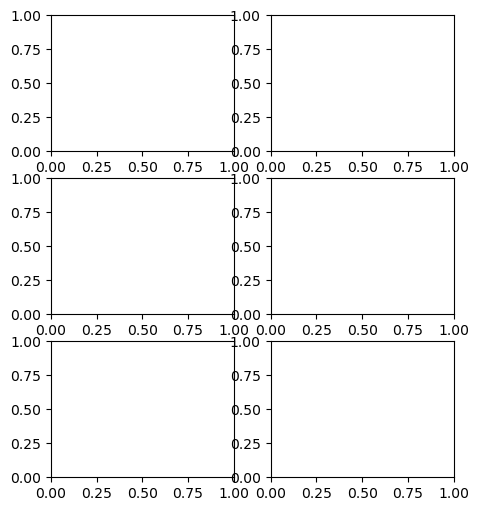

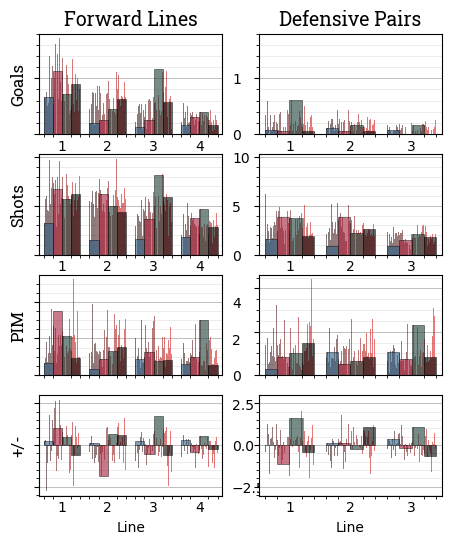

In [63]:
# Set up the plot

### FIG SIZES FOR PROGRAM
## TOTAL PRINTABLE AREA ON LETTER SIZE PAPER IS 8 x 10.6

### HALF PAGE ON LETTER SIZE PAPER IS 4 x 5.3
# fig, ax = plt.subplots(1, 2, figsize=(4, 5.3))
# fig, ax = plt.subplots(3, 2, figsize=(7.5, 4))

# PORTRAIT LAYOUT FOR 4 PLOT STACK - ADDING +/-
fig, ax = plt.subplots(4, 2, figsize=(5.2, 6))

## OTHER PARAMS
# Line Width
set_linewidth = .5

## FONT PARAMETERS
font_title_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 14}
font_label_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 8}
font_tick_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 6}
font_label_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 12}
font_tick_large_param = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'normal', 'size': 6}

font_tag_parm = {'family': 'Roboto Slab', 'color': 'black', 'weight': 'bold', 'size': 10}

#### Set color of background data
all_color = 'red'
#####################################################
############# GOALS ############################
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']
# Remove Line 4
defense_data = defense_data[defense_data['Line'] != '4']

# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data, 
            color=all_color, alpha=0.6, ax=ax[0,0], ci=None)
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
            palette=team_colors, ax=ax[0,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# Plot data for Defensemen
# Set y axis equal to Forwards
ax[0,1].set_ylim(ax[0,0].get_ylim()) # Set y axis equal to Forwards

sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data, 
            color=all_color, alpha=0.6, ax=ax[0,1], ci=None, linewidth=2)
sns.barplot(x='Line', y='AVG_Goals', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[0,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

#####################################################
######### SHOTS PER GAME ############################
# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data, 
            color=all_color, alpha=0.6, ax=ax[1,0], ci=None)
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[1,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# Plot data for Defensemen

ax[1,1].set_ylim(ax[1,0].get_ylim()) # Set y axis equal to Forwards
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data, 
            color= all_color, alpha=0.6, ax=ax[1,1], ci=None)
sns.barplot(x='Line', y='AVG_Shots', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[1,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)


######################### PLUS MINUS ############################
# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data, 
            color=all_color, alpha=0.6, ax=ax[3,0], ci=None)
sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
            palette=team_colors, ax=ax[3,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# Defencemen
# Plot data for Defensemen
# Set y axis equal to Forwards
ax[3,1].set_ylim(ax[3,0].get_ylim()) # Set y axis equal to Forwards

sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=defense_data,
            color=all_color, alpha=0.6, ax=ax[3,1], ci=None, linewidth=2)
sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])],
            palette=team_colors, ax=ax[3,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)


######################### END ############################

#####################################
############## PENALTY MINUTES ######

# Plot PIM for Forwards
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data, 
            color= all_color, alpha=0.6, ax=ax[2,0], ci=None)
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[2,0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# Plot PIM for Defensemen
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data, 
            color= all_color, alpha=0.6, ax=ax[2,1], ci=None)
sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
            palette=team_colors, ax=ax[2,1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)









###########################

ax[0, 0].set_ylabel('Goals', font_label_large_param)
ax[1, 0].set_ylabel('Shots', font_label_large_param)
ax[2,0].set_ylabel('PIM', font_label_large_param)
ax[3,0].set_ylabel('+/-', font_label_large_param)

# Remove Y Labels Defence plots
ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2,1].set_ylabel('')
ax[3,1].set_ylabel('')

# switch side of plot tick labels are on for all
ax[0, 0].tick_params(axis='y', labelleft=False, labelright=True)
ax[0, 1].tick_params(axis='y', labelleft=False, labelright=False)
ax[1, 0].tick_params(axis='y', labelleft=False, labelright=True)
ax[1, 1].tick_params(axis='y', labelleft=False, labelright=False)
ax[2,0].tick_params(axis='y', labelleft=False, labelright=True)
ax[2,1].tick_params(axis='y', labelleft=False, labelright=False)
ax[3,0].tick_params(axis='y', labelleft=False, labelright=True)
ax[3,1].tick_params(axis='y', labelleft=False, labelright=False)

# Set x tick marks to off on all plots
ax[0, 0].tick_params(axis='x', which='major', length=0)
ax[0, 1].tick_params(axis='x', which='major', length=0)
ax[1, 0].tick_params(axis='x', which='major', length=0)
ax[1, 1].tick_params(axis='x', which='major', length=0)
ax[2,0].tick_params(axis='x', which='major', length=0)
ax[2,1].tick_params(axis='x', which='major', length=0)
ax[3,0].tick_params(axis='x', which='major', length=0)
ax[3,1].tick_params(axis='x', which='major', length=0)







# change font size of tick labels
ax[0, 0].tick_params(axis='both', which='major', labelsize=10)
ax[0, 1].tick_params(axis='both', which='major', labelsize=10)
ax[1, 0].tick_params(axis='both', which='major', labelsize=10)
ax[1, 1].tick_params(axis='both', which='major', labelsize=10)


# Set Labels

# Remove X Labels from all plots
ax[0, 0].set_xlabel('', font_label_param)
ax[0, 1].set_xlabel('', font_label_param)
ax[1, 0].set_xlabel('', font_label_param)
ax[1, 1].set_xlabel('', font_label_param)
ax[2,0].set_xlabel('', font_label_param)
ax[2,1].set_xlabel('', font_label_param) 



# ax[0, 0].set_xlabel('', font_label_param)
# ax[0, 1].set_xlabel('', font_label_param)
# ax[0, 0].set_xlabel('Forward Lines', font_label_param)
# ax[0, 1].set_xlabel('Defensive Pairs', font_label_param)
# Move to the title
ax[0, 0].set_title('Forward Lines', font_title_param)
ax[0, 1].set_title('Defensive Pairs', font_title_param)

### Remove the x labels from bottom plots
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')
# Remove tick marks and tick mark labels from plots
# ax[1, 0].tick_params(axis='x', which='major', length=0)
# ax[1, 1].tick_params(axis='x', which='major', length=0)
# ax[2, 0].tick_params(axis='x', which='major', length=0)
# ax[2, 1].tick_params(axis='x', which='major', length=0)

ax[2, 0].set_xticklabels([])
ax[2, 1].set_xticklabels([])



#################
### ADD GRID MARKS
data = line_goals_assists_pim_position_df

for i in range(4):
    for j in range(2):
        

        # Set grid lines to go behind plot elements
        ax[i, j].set_axisbelow(True)

        # Add major grid lines
        ax[i, j].grid(
            color='grey', 
            linestyle='-', 
            linewidth=0.5, 
            alpha=0.7, 
            which='major', 
            axis='y'
        )

        # Add minor grid lines
        ax[i, j].minorticks_on()  # Enable minor ticks
        ax[i, j].grid(
            color='lightgrey',
            linestyle='-',
            linewidth=0.5,
            alpha=0.6,
            which='minor',
            axis='y'
        )

# Simplify the legend (example for the first subplot)
handles, labels = ax[0, 0].get_legend_handles_labels()
ax[0, 0].legend(handles[-2:], labels[-2:], title='Team')

# Remove Legend
for axis in ax.flat:
    if axis.get_legend() is not None:
        axis.get_legend().remove()


### Add Source and Signature Tags
# add_source_sig_text()

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}Three_plot_Layout.png', bbox_inches='tight', dpi=600, transparent=True) #TURN ON TRANPARENTCY WITH THIS


# Show the plot
plt.show()

## plus minus by line

In [64]:
# forwards_data.head()

C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\1638761876.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\1638761876.py:11: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data,
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\1638761876.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
C:\Users\Justin\AppData\Local\Temp\ipykernel_13340\1638761876.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns

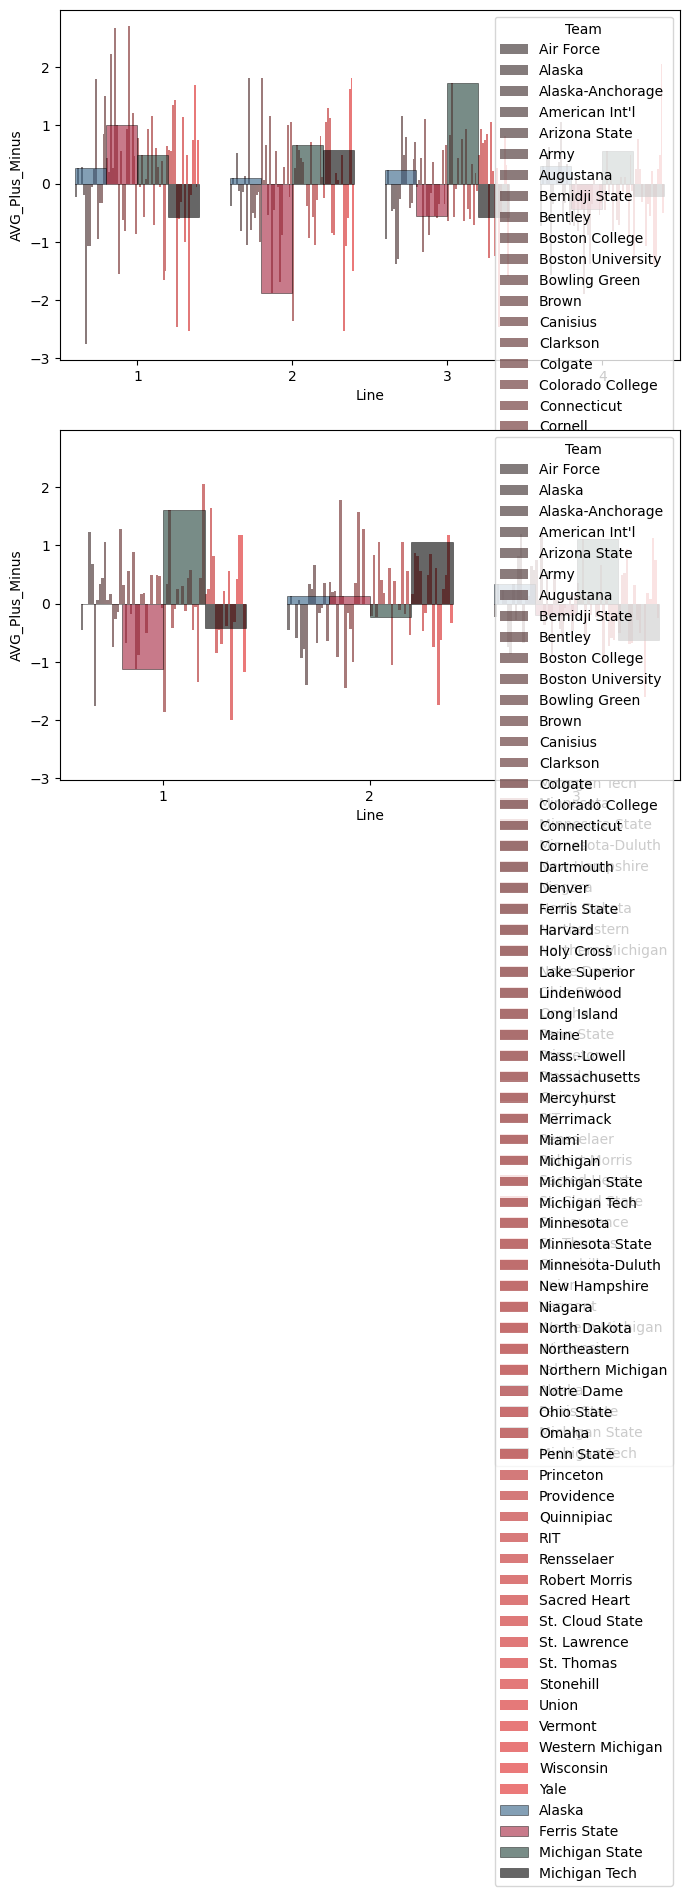

In [65]:
forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']
# Remove Line 4
defense_data = defense_data[defense_data['Line'] != '4']

# Create a figure with 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 10))


# Plot data for Forwards
sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data, 
            color=all_color, alpha=0.6, ax=ax[0], ci=None)
sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])],
            palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)

# Defencemen
# Plot data for Defensemen
# Set y axis equal to Forwards
ax[1].set_ylim(ax[0].get_ylim()) # Set y axis equal to Forwards

sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=defense_data,
            color=all_color, alpha=0.6, ax=ax[1], ci=None, linewidth=2)
sns.barplot(x='Line', y='AVG_Plus_Minus', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])],
            palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=set_linewidth)



## SHow the plot
plt.show()



In [66]:
# # Set up the plot
# # Set up the plot
# fig, ax = plt.subplots(2, 1, figsize=(8, 7))
# # set the font style for the title
# # title = fig.suptitle('Penalty Minutes By Lines and Position', **font_title_param)
# # title.set_fontsize(36)
# # title.set_fontweight('bold')
# # title.set_color('darkslategray')


# # Filter data for Forwards and Defensemen
# forwards_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Forward']
# defense_data = line_goals_assists_pim_position_df[line_goals_assists_pim_position_df['Type'] == 'Defense']

# # Plot PIM for Forwards
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data, 
#             color='grey', alpha=0.6, ax=ax[0], ci=None)
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=forwards_data[forwards_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[0], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Plot PIM for Defensemen
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data, 
#             color='grey', alpha=0.6, ax=ax[1], ci=None)
# sns.barplot(x='Line', y='AVG_PIM', hue='Team', data=defense_data[defense_data['Team'].isin([team_1, team_2, team_3, team_4])], 
#             palette=team_colors, ax=ax[1], ci=None, alpha=0.6, edgecolor='black', linewidth=2)

# # Add labels and title
# # Add labels and title
# ax[0].set_title('Penalty Minutes by Line', font_title_param)
# ax[0].set_xlabel('Line', font_label_param)
# ax[1].set_xlabel('Pair', font_label_param)
# ax[0].set_ylabel('Forwards', font_label_large_param)
# ax[1].set_ylabel('Defensemen', font_label_large_param)

# # Change Font Size of y axis labels
# ax[0].yaxis.label.set_size(32)
# ax[1].yaxis.label.set_size(32)

# # Simplify the legend to only show Michigan State and Boston College
# handles, labels = ax[0].get_legend_handles_labels()
# ax[0].legend(handles[-2:], labels[-2:], title='Team')

# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(handles[-2:], labels[-2:], title='Team')

# # # # Drop Legend if there is any
# if ax[0].get_legend() is not None:
#     ax[0].get_legend().remove()
# if ax[1].get_legend() is not None:
#     ax[1].get_legend().remove()

# # Change font size of tick labels
# ax[0].tick_params(axis='both', which='major', labelsize=18)
# ax[1].tick_params(axis='both', which='major', labelsize=18)




# ### Add Source and Signature Tags
# # add_source_sig_text()

# save_path = f'{TEMP_FOLDER}'
# os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# ## Get the string of the title and replace spaces with underscores
# title = plt.gca().get_title().replace(' ', '_')

# # Save Plot
# plt.savefig(f'{save_path}PIM_per_Game_by_Position.png', bbox_inches='tight', dpi=300)


# # Show the plot
# plt.show()

## Goals by Time of Game

TypeError: Image data of dtype object cannot be converted to float

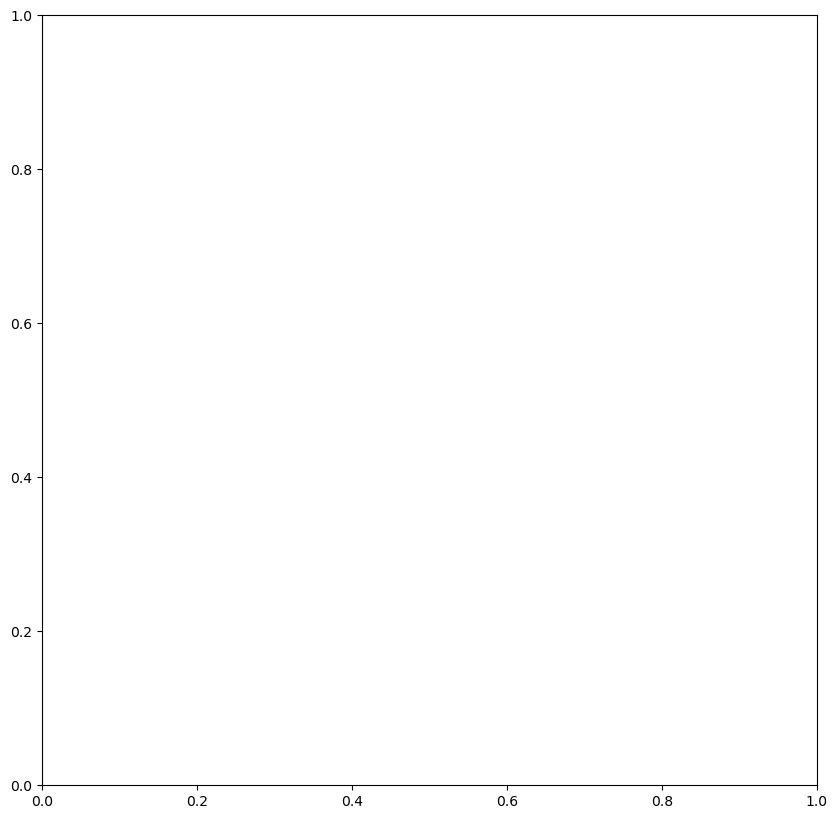

In [67]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def fetch_goals_time_data(conn):
    goals_time_query = """
    SELECT Team, Period, Time
    FROM scoring_summary;
    """
    return pd.read_sql(goals_time_query, conn)

def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0


def plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value):
    goals_time_df['Continuous_Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)
    
    fig, ax = plt.subplots(figsize=figure_size)

    all_teams_data = goals_time_df['Continuous_Time']
    bin_counts, bin_edges = np.histogram(all_teams_data, bins=range(0, 65))
    bin_avgs = bin_counts / len(np.unique(goals_time_df['Team']))
    # Scale down all-teams data by a factor of 0.5
    bin_avgs *= 0.15  # or bin_avgs = bin_avgs * 0.5

    # Find the maximum height you'll need on the y-axis
    max_y_value = max(bin_avgs)  # Since you're scaling down by 0.5
    max_y_plus_margin = max_y_value * 1.1  # Add some margin for better visibility

    
    ax.imshow(bg_img, aspect='auto', extent=[-5, 65, 0, max_y_plus_margin], zorder=0, alpha=alpha_value)


    # Moved this part below to plot it after the specific teams
    # ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = goals_time_df[goals_time_df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = goals_time_df[goals_time_df['Team'] == team_abrv_mapping[team]]
            
        if not team_data.empty:
            team_bin_counts, _ = np.histogram(team_data['Continuous_Time'], bins=range(0, 65))
            team_bin_avgs = team_bin_counts / len(team_data)  # Normalize by the number of goals by the team
            ax.bar(bin_edges[:-1], team_bin_avgs, width=1, alpha=1, label=f"{team} (Avg)", color=color, linewidth=2)
        else:
            print(f"No data found for team {team}")


        
    # Adjust background data plotting by scaling down by 0.75
    # ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    

    
    ax.axvspan(0, 20, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(20, 40, facecolor='lightgreen', alpha=0.3)
    ax.axvspan(40, 60, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(60, 65, facecolor='lightyellow', alpha=0.3)
    
    ax.set_title('Goals by Game Time', font_title_param)
    ax.set_xticks([0, 20, 40, 60, 65])
    ax.set_xticklabels(['1st Period', '2nd Period', '3rd Period', 'OT', 'End'], fontdict=font_tick_param)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    # Tick labels


    # # Place logos at upper corners
    # place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    # place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
    
    save_path = f'{TEMP_FOLDER}'
    os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
    ## Get the string of the title and replace spaces with underscores
    title = plt.gca().get_title().replace(' ', '_')

    ### Add Source and Signature Tags
    # add_source_sig_text()

    # Fixing y-axis: Show y-ticks and set limits
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    # ax.set_ylim([0, max_y_value * 1.1])  # Added some margin for better visibility

    # Remove white spaces by adjusting the subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    

    # Save Plot
    plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

# Usage
# conn = "your_database_connection_here"
# highlight_colors_shots = {"Team1": "red", "Team2": "blue"}  # Replace with actual team-color mapping
# figure_size = (12, 8)
# bg_img = "your_background_image_here"
alpha_val = 0.3  # Adjust the alpha value as needed

goals_time_df = fetch_goals_time_data(conn)
plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value)
